In [1]:
import Pkg
Pkg.activate("../../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using Revise
using LinearAlgebra
using Distributions
using Random
using StatsPlots
using PDMats
using StatsBase
using Base.Iterators
using DataFrames, TimeSeries, XLSX
using PrettyTables

In [3]:
includet("../VARs/utils.jl")
includet("../VARs/VAR_OLS.jl")

In [28]:
df = DataFrame(XLSX.readtable("../../data/usa_macro_data.xlsx", "Quarterly", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :observation_date), Dates.quarter, first)

display(returns_summarystats(data_source, 1)) 

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA,14747.7,68696.0,40245.4,54126.5,18032.0,0.1437,27572.0,0.9887,-1.2415,2.7289,39691.0
GDPDEF,32.7932,125.532,57.1572,85.8735,13.675,0.1832,22.089,0.9889,-1.1966,1.743,57.826
TB3MS,3.068,15.05,4.2468,5.705,0.01,0.798,1.945,0.9729,0.9205,1.3842,4.23
GS10,2.8911,14.85,5.6289,7.365,0.65,0.854,3.63,0.9853,0.4842,1.947,4.98
Price_10Y,1693.98,5588.73,1619.78,2790.36,108.272,0.8096,182.663,0.9916,-0.8309,0.9562,799.867
Stock_Price,1155.26,5446.68,887.969,1284.31,36.79,1.8486,95.46,0.9678,3.0694,0.7686,330.45
Dividend,18.171,71.9758,17.0102,22.755,1.5533,1.4778,3.165,0.9818,1.2258,0.9361,10.9233
E,47.3465,197.883,40.6421,60.17,2.8333,1.6168,5.945,0.9754,2.0048,0.8584,17.8633
CAPE,8.0844,43.2083,20.9759,25.9614,6.6434,0.4623,15.5916,0.9796,-0.1197,2.5946,20.5076
USACPIALLQINMEI,35.7757,132.851,55.6431,86.7908,11.265,0.2901,17.6359,0.9887,-1.1685,1.5553,53.1045


nothing

In [29]:
data_source[:GDPDEF]

279×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1955-01-01 to 2024-07-01
┌────────────┬─────────┐
│            │ GDPDEF  │
├────────────┼─────────┤
│ 1955-01-01 │  13.675 │
│ 1955-04-01 │  13.731 │
│ 1955-07-01 │  13.827 │
│ 1955-10-01 │  13.964 │
│ 1956-01-01 │  14.104 │
│ 1956-04-01 │  14.187 │
│ 1956-07-01 │  14.365 │
│ 1956-10-01 │  14.423 │
│     ⋮      │    ⋮    │
│ 2023-01-01 │ 121.251 │
│ 2023-04-01 │ 121.804 │
│ 2023-07-01 │ 122.768 │
│ 2023-10-01 │ 123.241 │
│ 2024-01-01 │ 124.163 │
│ 2024-04-01 │ 124.943 │
│ 2024-07-01 │ 125.532 │
└────────────┴─────────┘
        264 rows omitted

In [30]:
freq = 1

cpi = (log.(data_source[:GDPDEF]) .- lag(log.(data_source[:GDPDEF]),4)) .* 100 
gdp = (log.(data_source[:A939RX0Q048SBEA]) .- lag(log.(data_source[:A939RX0Q048SBEA]),4)) .* 100 
sr = (data_source[:TB3MS]) .- cpi
term = (data_source[:GS10]) .- (data_source[:TB3MS])
#Δd = (log.(data_source[:Dividend]) .- lag(log.(data_source[:Dividend]),4)) .* 100 .- cpi
Δd = percentchange(data_source[:Dividend], :log) .* 400 .- cpi
dy = round.((log.(data_source[:Dividend]) .- log.(data_source[:Stock_Price])), digits=2)

data= merge(gdp, cpi, sr, term, Δd, dy)

start = Date(1985, 01,01)
end_d = Date(2024, 12, 31)
s_data = to(from(data, start),end_d)

display(returns_summarystats(s_data, freq)) 
display(cor(values(s_data)))



,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA_A939RX0Q048SBEA,1.9201,11.4109,1.7029,2.8079,-8.2584,-0.8873,1.0132,0.6838,8.7904,0.8869,1.8675
GDPDEF_GDPDEF,1.1793,7.4709,2.3319,2.7695,0.1153,1.7607,1.6577,0.9458,4.7314,1.9773,2.0521
TB3MS_GDPDEF_GDPDEF,2.4086,4.7148,0.8506,3.1995,-6.4539,-0.4414,-0.9039,0.9656,-0.1208,0.3531,0.6274
GS10_TB3MS,1.2048,3.7,1.6401,2.655,-1.48,-0.299,0.74,0.9159,-0.6069,1.3614,1.65
Dividend_GDPDEF_GDPDEF,6.7407,18.4065,3.3639,7.4148,-26.7338,-1.587,0.7788,0.8949,5.1349,0.499,3.9817
Dividend_Stock_Price,0.3208,-3.17,-3.8762,-3.595,-4.5,0.3421,-4.095,0.9538,-0.6936,-12.0821,-3.93


nothing

6×6 Matrix{Float64}:
  1.0        0.262863    0.122466   -0.101136   0.330021    -0.174588
  0.262863   1.0        -0.143025   -0.217046   0.154268     0.0701478
  0.122466  -0.143025    1.0        -0.23493   -0.0894649    0.355108
 -0.101136  -0.217046   -0.23493     1.0       -0.153411     0.402236
  0.330021   0.154268   -0.0894649  -0.153411   1.0          0.00475068
 -0.174588   0.0701478   0.355108    0.402236   0.00475068   1.0

In [31]:
s_data[:GDPDEF_GDPDEF]

159×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1985-01-01 to 2024-07-01
┌────────────┬───────────────┐
│            │ GDPDEF_GDPDEF │
├────────────┼───────────────┤
│ 1985-01-01 │       3.46524 │
│ 1985-04-01 │       3.25498 │
│ 1985-07-01 │        2.9721 │
│ 1985-10-01 │       2.78471 │
│ 1986-01-01 │       2.29697 │
│ 1986-04-01 │       2.03333 │
│ 1986-07-01 │       1.84041 │
│ 1986-10-01 │       1.82644 │
│     ⋮      │       ⋮       │
│ 2023-01-01 │       5.18964 │
│ 2023-04-01 │       3.40108 │
│ 2023-07-01 │        3.0694 │
│ 2023-10-01 │       2.53426 │
│ 2024-01-01 │       2.37324 │
│ 2024-04-01 │       2.54444 │
│ 2024-07-01 │       2.22643 │
└────────────┴───────────────┘
              144 rows omitted

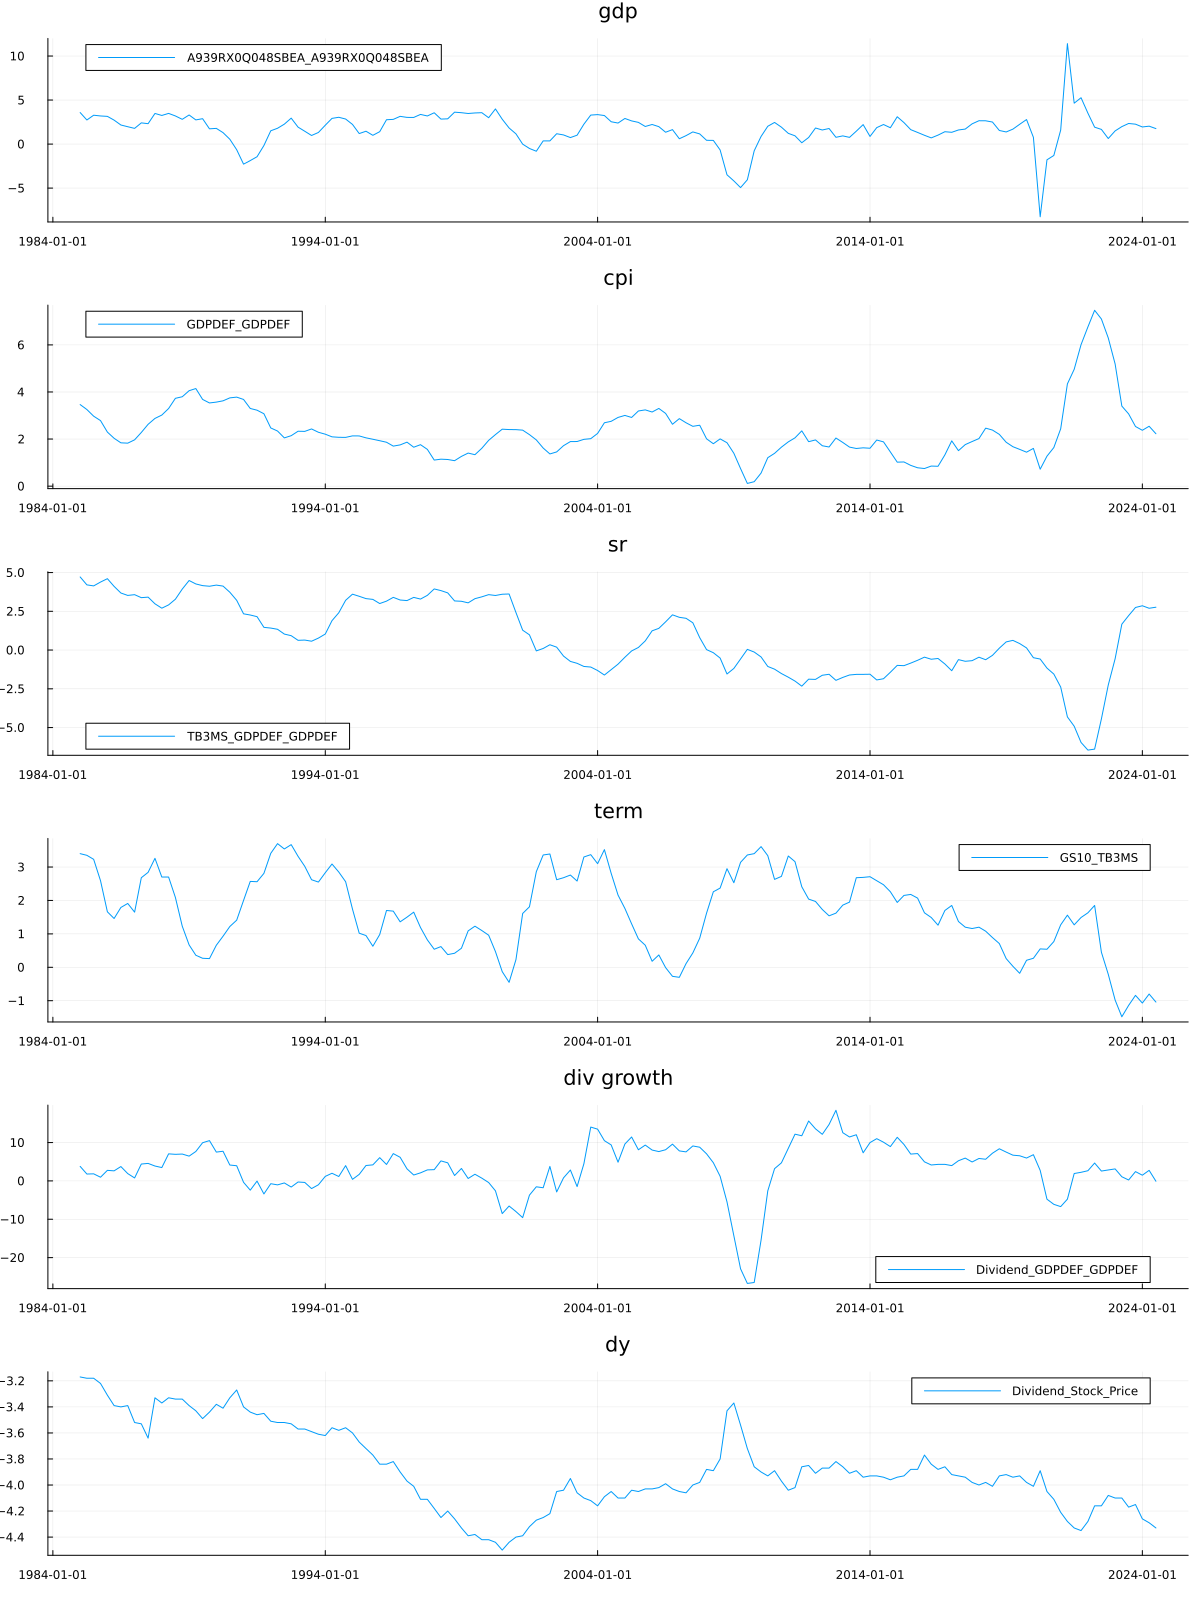

In [32]:
plot(s_data; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

In [33]:
assets_names = colnames(s_data)
T, n_assets = size(s_data)
model = VARModel(s_data)
model_summary(model)

,const,A939RX0Q048SBEA_A939RX0Q048SBEA,GDPDEF_GDPDEF,TB3MS_GDPDEF_GDPDEF,GS10_TB3MS,Dividend_GDPDEF_GDPDEF,Dividend_Stock_Price,std
A939RX0Q048SBEA_A939RX0Q048SBEA,-2.7206,0.6622,-0.0075,0.0852,0.1712,-0.0014,-0.762,1.402
GDPDEF_GDPDEF,-0.1256,0.0664,0.9227,-0.0296,0.0289,-0.0075,-0.0483,0.3519
TB3MS_GDPDEF_GDPDEF,-0.1133,-0.0149,0.145,0.9797,-0.0066,0.0083,0.0547,0.5019
GS10_TB3MS,0.307,-0.0471,-0.0608,0.0042,0.9214,-0.0065,-0.0092,0.3985
Dividend_GDPDEF_GDPDEF,-0.5467,0.687,-0.198,-0.1783,0.2103,0.8375,-0.0427,2.7773
Dividend_Stock_Price,-0.4298,-0.0042,0.0173,0.0047,0.0219,0.0032,0.9126,0.0657


,A939RX0Q048SBEA_A939RX0Q048SBEA,GDPDEF_GDPDEF,TB3MS_GDPDEF_GDPDEF,GS10_TB3MS,Dividend_GDPDEF_GDPDEF,Dividend_Stock_Price
A939RX0Q048SBEA_A939RX0Q048SBEA,1.0,0.41,-0.05,-0.07,0.18,-0.31
GDPDEF_GDPDEF,0.41,1.0,-0.63,0.18,0.03,-0.06
TB3MS_GDPDEF_GDPDEF,-0.05,-0.63,1.0,-0.51,-0.02,-0.15
GS10_TB3MS,-0.07,0.18,-0.51,1.0,0.09,0.17
Dividend_GDPDEF_GDPDEF,0.18,0.03,-0.02,0.09,1.0,0.02
Dividend_Stock_Price,-0.31,-0.06,-0.15,0.17,0.02,1.0


In [43]:
freq = 4
scenarios = simulate(model, 25*freq, 10_000)
#periods = [2,6, 16, 26]
periods_years = [1,5, 15, 25]

scenarios_years = scenarios[:,periods_years .*freq,:]



6×4×10000 Array{Float64, 3}:
[:, :, 1] =
  1.92484    4.74072    4.97246    0.998693
  2.89897    4.69179    3.22671   -0.323939
  1.80392    0.538074   3.72152    0.0663055
 -0.420724  -1.12382   -0.262226   2.76919
 -3.23916   12.2813     1.10562   -8.97488
 -4.48696   -4.3994    -4.04648   -4.3054

[:, :, 2] =
  4.04287    0.832782   1.93252   -1.55015
  2.0801     3.27945    3.1432     1.61095
  2.45032    1.26902   -0.689166   4.99256
 -0.980657   0.317666   1.13183    1.00241
  0.899945   0.869832   7.43196   -2.56205
 -4.44248   -4.22357   -3.73471   -3.90837

[:, :, 3] =
  1.58466    2.28447     2.05196    1.74096
  1.97844    3.39214     1.08188    2.01337
  1.71243    0.682314    0.681563  -2.05386
 -0.598297  -0.0399841   1.23994    2.87615
  6.13942   -5.29968     3.01031   -1.43104
 -4.18609   -4.57175    -4.25356   -4.13624

;;; … 

[:, :, 9998] =
  5.03461    4.82431     3.00963    1.31529
  2.25968    4.29888     3.80941    1.31193
  3.22279    1.08331     0.15912   -0.

In [44]:
percentile(scenarios[3,5,:], [.25,.5,.75])

3-element Vector{Float64}:
 -0.3297524221298209
 -0.07319508780951478
  0.07550184711269581

In [45]:
cpi = cumsum(scenarios[2,2:4:101,:],dims=1)[periods_years,:] ./periods_years
sr = scenarios[2,:,:] + scenarios[3,:,:]
lr = scenarios[2,:,:] + scenarios[3,:,:] + scenarios[4,:,:]
Δd = (scenarios[2,:,:] + scenarios[5,:,:]) 
Δd_cum = cumsum(Δd[2:4:101,:],dims=1)[periods_years,:] ./periods_years
dy = exp.(scenarios[6, :,:])
eq_return = calculate_equity_returns(Δd, scenarios[6, :,:])
eq_return_cum = cumsum(eq_return[2:4:101,:],dims=1)[periods_years,:] ./periods_years
real_eq_return = eq_return[1:4:100,:] .- scenarios[2,1:4:100,:] 
real_eq_return_cum = cumsum(real_eq_return, dims=1)[periods_years,:] ./periods_years
bond_returns = calculate_bond_returns(lr[1:4:101,:]./100, 10, 1)
bond_cum_returns = cumsum(bond_returns, dims=1)[periods_years,:] ./ periods_years


periods = periods_years.*freq.+1

print_scenarios_percentiles(cpi, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "cpi")
print_scenarios_percentiles(sr[periods,:], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "sr")
print_scenarios_percentiles(lr[periods,:], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "lr")
print_scenarios_percentiles(Δd_cum, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "div growth")
print_scenarios_percentiles(dy[periods,:], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "dy")
print_scenarios_percentiles(eq_return_cum, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity")
print_scenarios_percentiles(real_eq_return_cum, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "real equity")
print_scenarios_percentiles(bond_cum_returns, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "bonds")


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,1.317,1.4472,1.5571,1.8986,2.1437,2.3821,2.718,2.8304,2.9923
5,0.6128,0.8787,1.1072,1.7251,2.1933,2.6432,3.2669,3.4913,3.7174
10,1.1571,1.3294,1.4942,2.0032,2.3496,2.6906,3.1699,3.3416,3.5575
25,1.4342,1.5772,1.712,2.1071,2.3736,2.642,3.0377,3.1637,3.3128


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.3414,2.6601,2.9304,3.7407,4.3078,4.8679,5.6703,5.9214,6.1912
5,-1.0016,-0.3307,0.2676,2.0971,3.3673,4.6372,6.4493,7.0511,7.7289
10,-2.0483,-1.2362,-0.5551,1.5298,2.9418,4.3959,6.4668,7.1361,7.8387
25,-1.969,-1.2919,-0.6479,1.4404,2.8379,4.2846,6.3944,6.9852,7.8438


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.3004,2.6131,2.8379,3.5628,4.0563,4.5715,5.2954,5.5411,5.8379
5,0.7697,1.2931,1.7273,3.1403,4.0888,5.0548,6.3872,6.821,7.2644
10,0.1322,0.6884,1.2316,2.92,4.0362,5.1376,6.7485,7.2883,7.933
25,0.2057,0.8146,1.333,2.9256,4.0046,5.1019,6.7618,7.2693,7.9366


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-4.6325,-3.6622,-2.7611,-0.1311,1.774,3.6554,6.4384,7.3263,8.3696
5,-4.8519,-3.5376,-2.2628,1.2731,3.6863,6.1671,9.7572,10.9777,12.5275
10,-0.3917,0.6188,1.4449,3.7424,5.3653,7.0112,9.3694,10.1558,10.9338
25,1.0963,1.7708,2.3404,4.2094,5.5641,6.902,8.8543,9.4556,10.1641


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,0.0089,0.0093,0.0097,0.011,0.012,0.013,0.0148,0.0154,0.0161
5,0.0073,0.0079,0.0087,0.0111,0.0133,0.0159,0.0205,0.0224,0.0244
10,0.0081,0.009,0.0099,0.0132,0.0161,0.0198,0.0267,0.0294,0.0323
25,0.0083,0.0093,0.0101,0.0137,0.0166,0.0203,0.0274,0.03,0.033


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.1172,-0.0914,-0.0661,0.0064,0.0558,0.1054,0.1767,0.2007,0.2278
5,-0.0495,-0.0346,-0.0207,0.0228,0.052,0.0821,0.127,0.1437,0.159
10,-0.0012,0.0103,0.0192,0.0465,0.0657,0.0848,0.1131,0.1225,0.1328
25,0.0178,0.0252,0.0316,0.0537,0.0692,0.0846,0.1077,0.1154,0.1231


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-2.331,-2.3043,-2.2816,-2.2129,-2.1665,-2.1188,-2.051,-2.0299,-2.0024
5,-3.5522,-3.3403,-3.1404,-2.5568,-2.1454,-1.7155,-1.1271,-0.9101,-0.6803
10,-3.4787,-3.2819,-3.1014,-2.6246,-2.2856,-1.94,-1.4425,-1.2631,-1.0857
25,-3.2568,-3.1004,-2.9729,-2.5777,-2.3066,-2.0325,-1.6375,-1.5071,-1.3516


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.0912,-0.0721,-0.0558,-0.0059,0.0316,0.0691,0.1273,0.1461,0.1729
5,0.0046,0.0094,0.0139,0.0284,0.0393,0.0512,0.0697,0.0759,0.0831
10,0.0209,0.0244,0.0271,0.0355,0.0415,0.0476,0.0565,0.0595,0.063
25,0.0222,0.0251,0.0278,0.0359,0.0414,0.0473,0.0552,0.0579,0.0612


In [46]:
mdd, mddl = max_drawdown_and_length(eq_return)

display(" equity")
display("mdd")
display(quantile(mdd, [.03, .25, .5, .75, .97])')
display("mddl")
display(quantile(mddl, [.03, .25, .5, .75, .97])')

" equity"

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.0862114  0.173628  0.26697  0.396539  0.671441

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 4.0  8.0  13.0  20.0  38.0

In [38]:
B = collect(model.C[2:end,:]')

resp = girf(B, model.Σ, 8, 2)

plot(resp; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

MethodError: MethodError: no method matching girf(::Matrix{Float64}, ::Matrix{Float64}, ::Int64, ::Int64)
The function `girf` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  girf(::Matrix{Float64}, ::Matrix{Float64}, ::Int64, ::Int64, !Matched::Any)
   @ Main c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\_wip\VARs\utils.jl:213


In [39]:
display(exp(-3.8 ) *100) 
display(exp(-3.8 + 0.08)*100) 
display((exp(-3.8 ) - exp(-3.8 + 0.08))*100) 
display(0.0224*exp((0.06^2)-1)^.5 *100)
display(exp(-4.8 ) *100) 

2.23707718561656

2.4233967845691122

-0.1863195989525522

1.3610764116758998

0.822974704902003

IRF returns
- estimate dy, and div idnex, based on initial value, mean?
- estimate returns?
- 

In [40]:
resp

UndefVarError: UndefVarError: `resp` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [41]:
real_Δd = resp[:,2] + resp[:,5]




UndefVarError: UndefVarError: `resp` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [42]:
dy = exp.(scenarios[6, :,:])

101×10000 Matrix{Float64}:
 0.0131675   0.0131675   0.0131675   …  0.0131675  0.0131675  0.0131675
 0.0124644   0.012235    0.0120691      0.0131582  0.0127069  0.0124427
 0.0116044   0.011609    0.011649       0.0125919  0.0118986  0.0132303
 0.0102289   0.0121516   0.011568       0.0128145  0.0118117  0.0124906
 0.00959849  0.0105576   0.0103742      0.0121127  0.0111852  0.0117286
 0.00887954  0.0107493   0.0104115   …  0.0131338  0.0106134  0.00940413
 0.00886681  0.00978952  0.0102071      0.0144727  0.0114192  0.00862869
 0.00791124  0.0102927   0.0106353      0.0132561  0.0113029  0.00874133
 0.0078971   0.0101632   0.0104668      0.0127165  0.0119858  0.00800092
 0.00678753  0.010144    0.0101283      0.0119996  0.0130496  0.0085464
 ⋮                                   ⋱                        
 0.0118906   0.0191916   0.0109382      0.0166207  0.0191487  0.0248318
 0.012079    0.0194734   0.0098699      0.0156166  0.0174963  0.0236676
 0.0120668   0.019767    0.0103232      0.